# Actividad

- **Nombre**: 
Daira Adriana Chavarría Rodríguez

- **Matrícula**: 
A01274745


# Entregar 
Archivo PDF de la actividad y la liga de la actividad en su repostitorio.

# Nota: 
Todas las tareas entregadas fuera de la fecha limite se califican sobre 50 de los 100 puntos posibles.

# Importante: 
- Colocar nombre en ejes en gráficas
- Nombre en gráficas 
- Conclusiones con el nombre de cada alumno
- Contestar cada pregunta


#**Presion Arterial**

1. Carga los datos del archivo **presion.csv**

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [8]:
%pwd
%cd 'drive/MyDrive/semanaTec/arte-analitica'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/content/drive/MyDrive/semanaTec/arte-analitica


In [9]:
presion = pd.read_csv('data/presion.csv', )
presion.head()

,edad,Average of ap_hi,Average of ap_lo
0,30,112.500000,72.500000
1,39,119.029340,88.229829
2,40,119.789630,85.858889
3,41,121.490862,90.344648
4,42,120.163872,89.887957


2. Gráfica la información en el eje de las x la edad  y en el eje y la presión ( alta y baja) 


Text(0, 0.5, 'Promedio presión alta')

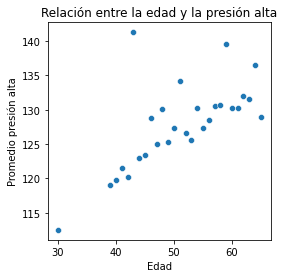

In [30]:
# alta
fig, axs = plt.subplots(figsize=(4,4))
sns.scatterplot(data=presion, x='edad',y='Average of ap_hi')
plt.title("Relación entre la edad y la presión alta")
plt.xlabel("Edad")
plt.ylabel("Promedio presión alta")

Text(0, 0.5, 'Promedio presión baja')

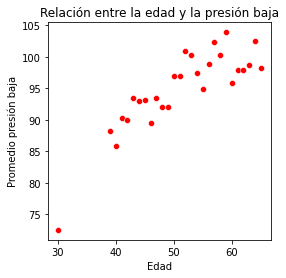

In [31]:
# baja
fig, axs = plt.subplots(figsize=(4,4))
sns.scatterplot(data=presion, x='edad',y='Average of ap_lo', color='red')
plt.title("Relación entre la edad y la presión baja")
plt.xlabel("Edad")
plt.ylabel("Promedio presión baja")

3. Genera una regresión líneal para obtener una aproximación de la ecuación 
$$
y = ax + b
$$
donde $ a $ se conoce comúnmente como **pendiente**, y $ b $ se conoce comúnmente como **intersección**.

¿Cuál es el valor de a y cuál es el valor de b para la presión alta y baja?

In [94]:
from sklearn.linear_model import LinearRegression
model_hi = LinearRegression(fit_intercept=True)
x_hi=presion['edad']
y_hi=presion['Average of ap_hi']
model_hi.fit(x_hi[:, np.newaxis], y_hi)

xfit_hi = np.linspace(0, 70, 1000)
yfit_hi = model_hi.predict(xfit_hi[:, np.newaxis])

hi_coef = model_hi.coef_[0]
hi_intercept = model_hi.intercept_

print("Model slope (pendiente):    ", hi_coef)
print("Model intercept (intersección):", hi_intercept)

Model slope (pendiente):     0.4776970297766919
Model intercept (intersección): 103.39697409643658


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


In [95]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
x=presion['edad']
y=presion['Average of ap_lo']
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 70, 1000)
yfit = model.predict(xfit[:, np.newaxis])

lo_coef = model.coef_[0]
lo_intercept = model.intercept_

print("Model slope (pendiente):    ", lo_coef)
print("Model intercept (intersección):", lo_intercept)

Model slope (pendiente):     0.6089810580238239
Model intercept (intersección): 63.726200409422745


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


4. Gráfica los datos reales vs modelo obtenido. 

Se debe visualizar los datos reales ( azules) 
Recta del modelo ( negra) 
Distancias ( verde ) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Regresión lineal: Presión alta')

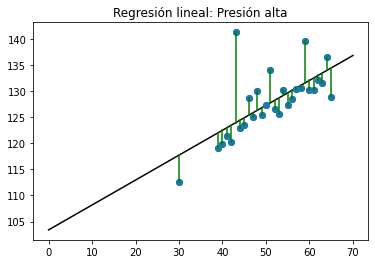

In [78]:
plt.scatter(x_hi, y_hi)
plt.plot(xfit_hi, yfit_hi, color="black");
plt.plot(x_hi,y_hi, 'o')
plt.plot(np.vstack([x_hi,x_hi]), np.vstack([y_hi, model_hi.predict(x_hi[:, np.newaxis])]), color="green");
plt.title("Regresión lineal: Presión alta")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Regresión lineal: Presión baja')

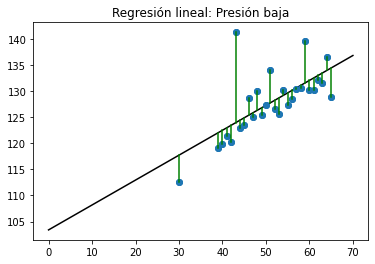

In [79]:
plt.scatter(x, y)
plt.plot(xfit, yfit, color="black");
plt.plot(x,y, 'o')
plt.plot(np.vstack([x,x]), np.vstack([y, model.predict(x[:, np.newaxis])]), color="green");
plt.title("Regresión lineal: Presión baja")

5. ¿Cuál es la presión arterial hi y lo esperada para una persona de 76 años?

Genera una función que calcule lo anterior

In [97]:
edad_calcular=42

def presionLo(edad):
  r = lo_intercept + (lo_coef * edad)
  return r

presionLo(edad_calcular)

89.30340484642335

In [98]:
def presionHi(edad):
  r = hi_intercept + (hi_coef * edad)
  return r 

presionHi(edad_calcular)

123.46024934705764

Conclusiones 

 matrícula- Nombre alumno : detalle

**A01274745 - Daira Adriana Chavarría Rodríguez:**

Es de gran ayuda tener modelos que puedan predecir temas tan diversos como la salud de las personas, tomando en cuenta el promedio de datos y, a partir de ello, la edad a proyectar.
Este tipo de herramientas pueden facilitar la vida de la gente y, como su nombre lo dice, predecir temas de gran importancia.





#Opcion1: **Ventas de mi negocio**



Nuestro objetivo será construir un modelo que nos permita estimar las ventas de una empresa dependiendo de cuánto presupuesto se gaste en cada medio de difusión.

1. Carga los datos del archivo AdvmiNegocio.csv

In [11]:
ventas_df = pd.read_csv('data/AdvmiNegocio.csv', )
ventas_df.head()

,Unnamed: 0,Redes,Youtube,TV,sales
0,1,6903,1134,2076,663
1,2,1335,1179,1353,312
2,3,516,1377,2079,279
3,4,4545,1239,1755,555
4,5,5424,324,1752,387


2. Generar una grafica para visuaizar  cómo se relaciona cada columna de presupuesto contra las ventas. De mi negocio. ( Redes,Youtube,TV)


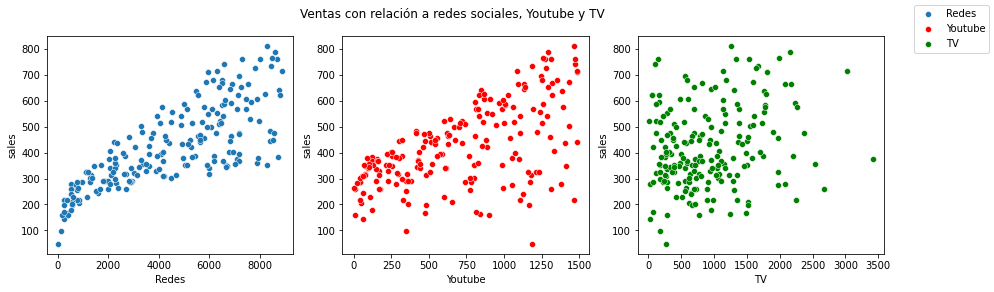

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(15,4))

fig.suptitle('Ventas con relación a redes sociales, Youtube y TV')

sns.scatterplot(data=ventas_df, x='Redes',y='sales', ax=axs[0])
sns.scatterplot(data=ventas_df, x='Youtube',y='sales', ax=axs[1], color='red')
sns.scatterplot(data=ventas_df, x='TV',y='sales', ax=axs[2], color='green')

fig.legend(labels=['Redes', 'Youtube', 'TV'])

3. ¿ Qué conclusiones puedes obtener de las graficas anteriores?


Daira Adriana Chavarría Rodríguez: 
* Las ventas por Youtube resultan ser mayores a comparación de TV y redes.
* A pesar de tener una gráfica más estable, es decir una línea más notoria; la gráfica de **Redes** nos dice que requerimos gastar un **mayor presupuesto**.
* Además de lo anteriormente mencionado, las ventas por **Youtube** resultan tener un **mayor beneficio** con relación al presupuesto gastado.
* A pesar de tener un "ruido" notorio, o una dispersión en la gráfica de TV, las ventas logradas se concentran principalmente en un rango de 200-500.


4. **Regresión lineal**. En su forma más simple, consiste en asumir que una variable $x$ y una variable $y$ presentan una relación lineal de la forma:

$$ y \approx \beta_0 + \beta_1 \cdot x$$

¿Cuál es el valor de beta_0 , beta_1 y el Score  para **Redes vs Ventas** , **TV vs Ventas** y **YouTube vs Ventas**?

In [84]:
# La función para implementar una regresión lineal en Python
from sklearn.linear_model import LinearRegression
# Con esta función, podemos calcular los coeficientes para cada una de las variables

# Redes
lm1 = LinearRegression()
# La variable X la ponemos con doble corchete!
lm1.fit(ventas_df[['Redes']], ventas_df['sales'])
print('Redes vs Ventas')
print('beta_0: ', lm1.intercept_)
print('beta_1: ', lm1.coef_)
print('Score: ', lm1.score(ventas_df[['TV']], ventas_df['sales']), '\n')

# Youtube
lm2 = LinearRegression()
# La variable X la ponemos con doble corchete!
lm2.fit(ventas_df[['Youtube']], ventas_df['sales'])
print('Youtube vs Ventas')
print('beta_0: ', lm2.intercept_)
print('beta_1: ', lm2.coef_)
print('Score: ', lm2.score(ventas_df[['Youtube']], ventas_df['sales']), '\n')


# TV
lm3 = LinearRegression()
# La variable X la ponemos con doble corchete!
lm3.fit(ventas_df[['TV']], ventas_df['sales'])
print('TV vs Ventas')
print('beta_0: ', lm3.intercept_)
print('beta_1: ', lm3.coef_)
print('Score: ', lm3.score(ventas_df[['TV']], ventas_df['sales']))

Redes vs Ventas
beta_0:  210.97780647383084
beta_1:  [0.04753664]
Score:  -1.0808654511451166 

Youtube vs Ventas
beta_0:  279.3491428547485
beta_1:  [0.20249578]
Score:  0.33203245544529536 

TV vs Ventas
beta_0:  370.5422120783448
beta_1:  [0.0546931]
Score:  0.05212044544430494


5. ¿Cuál de los modelos es mejor de acuerdo al score? ordenalos del mejor al peor

Ordenados de mejor al peor:


1. Youtube
2. TV
3. Redes



6.  **Regresión lineal múltiple**. Como ahora vamos a incluir más de una variable, el modelo se rescribe a :

$$ \hat{y} = \hat{\beta}_0 + \hat{\beta}_1 \cdot x_1 + \hat{\beta}_2 \cdot x_2 + \hat{\beta}_3\cdot x_3 + \ldots \epsilon $$

Elige  las diferentes combinaciones de variables. Ejemplo: Redes y Youtube vs Ventas 

¿Cuál es el valor de beta_0, betas_1 , beta_2 , el score y el score ajustado de **Redes y Youtube vs Ventas**, **Redes y TV vs Ventas**, **Youtube y TV vs Ventas**, **Redes y TV**, **Tv y Redes vs Ventas**  y **Ventas vs Youtube vs Ventas**  ?



In [29]:
# Vamos a calcular el modelo con dos variables simultáneas
# Vamos a definir una función para calcular esta métrica.
def score_adj(X, y, model):
    return 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

# Redes  y Youtube
lm4 = LinearRegression()
# La variable X la ponemos con doble corchete!
lm4.fit(ventas_df[['Redes', 'Youtube']], ventas_df['sales'])
print('Redes  y Youtube')
print('beta_0: ', lm4.intercept_)
print('betas: ', lm4.coef_)
print('Score: ', lm4.score(ventas_df[['Redes', 'Youtube']], ventas_df['sales']))
print('Score ajustado:', score_adj(ventas_df[['Redes', 'Youtube']], ventas_df['sales'], lm4), '\n')

# Redes y TV
lm5 = LinearRegression()
# La variable X la ponemos con doble corchete!
lm5.fit(ventas_df[['Redes','TV']], ventas_df['sales'])
print('Redes y TV')
print('beta_0: ', lm5.intercept_)
print('betas: ', lm5.coef_)
print('Score: ', lm5.score(ventas_df[['Redes','TV']], ventas_df['sales']))
print('Score ajustado:', score_adj(ventas_df[['Redes', 'TV']], ventas_df['sales'], lm5), '\n')

# Youtube y TV
lm6 = LinearRegression()
# La variable X la ponemos con doble corchete!
lm6.fit(ventas_df[['Youtube','TV']], ventas_df['sales'])
print('Youtube y TV')
print('beta_0: ', lm6.intercept_)
print('betas: ', lm6.coef_)
print('Score: ', lm6.score(ventas_df[['Youtube','TV']], ventas_df['sales']))
print('Score ajustado:', score_adj(ventas_df[['Youtube', 'TV']], ventas_df['sales'], lm6), '\n')

# Youtube y Redes
lm7 = LinearRegression()
# La variable X la ponemos con doble corchete!
lm7.fit(ventas_df[['Youtube','Redes']], ventas_df['sales'])
print('Youtube y Redes')
print('beta_0: ', lm7.intercept_)
print('betas: ', lm7.coef_)
print('Score: ', lm7.score(ventas_df[['Youtube','Redes']], ventas_df['sales']))
print('Score ajustado:', score_adj(ventas_df[['Youtube', 'Redes']], ventas_df['sales'], lm7), '\n')

# TV y Youtube
lm8 = LinearRegression()
# La variable X la ponemos con doble corchete!
lm8.fit(ventas_df[['TV','Youtube']], ventas_df['sales'])
print('TV y Youtube')
print('beta_0: ', lm8.intercept_)
print('betas: ', lm8.coef_)
print('Score: ', lm8.score(ventas_df[['TV','Youtube']], ventas_df['sales']))
print('Score ajustado:', score_adj(ventas_df[['TV', 'Youtube']], ventas_df['sales'], lm8), '\n')

# TV y Redes
lm9 = LinearRegression()
# La variable X la ponemos con doble corchete!
lm9.fit(ventas_df[['TV','Redes']], ventas_df['sales'])
print('TV y Redes')
print('beta_0: ', lm9.intercept_)
print('betas: ', lm9.coef_)
print('Score: ', lm9.score(ventas_df[['TV','Redes']], ventas_df['sales']))
print('Score ajustado:', score_adj(ventas_df[['TV', 'Redes']], ventas_df['sales'], lm9), '\n')

Redes  y Youtube
beta_0:  87.63299737215414
betas:  [0.04575482 0.18799423]
Score:  0.8971942610828956
Score ajustado: 0.8961505479974428 

Redes y TV
beta_0:  173.24843903734896
betas:  [0.04690121 0.04421942]
Score:  0.6458354938293271
Score ajustado: 0.6422399150864777 

Youtube y TV
beta_0:  275.66761377589694
betas:  [0.19904459 0.00664417]
Score:  0.33270518395032256
Score ajustado: 0.3259306172899198 

Youtube y Redes
beta_0:  87.6329973721542
betas:  [0.18799423 0.04575482]
Score:  0.8971942610828956
Score ajustado: 0.8961505479974428 

TV y Youtube
beta_0:  275.6676137758969
betas:  [0.00664417 0.19904459]
Score:  0.33270518395032256
Score ajustado: 0.3259306172899198 

TV y Redes
beta_0:  173.24843903734907
betas:  [0.04421942 0.04690121]
Score:  0.6458354938293271
Score ajustado: 0.6422399150864777 



¿Cuál modelo es el que nos conviene elegir?

El mejor modelo es usar tanto **Youtube** como las **Redes**.

8. Conclusiones 

 matrícula- Nombre alumno : detalle

**Daira Adriana Chavarría Rodríguez A01274745**

Este tipo de actividades nos permiten conocer nuestros datos y predecir el resultado de, por ejemplo, inversiones en negocios o resultados de partidos.
Se pueden utilizar este tipo de modelos en básicamente todos los aspectos posibles, desde los negocios hasta la salud.

Son herramientas para observar con detalle los cambios ocurridos a lo largo del tiempo, o sobre variables como la edad. 



#Opcion2: **Gastos en seguro**

Nuestro objetivo será construir un modelo que nos permita estimar los gastos de seguro dependiendo de edad,sexo, indice de masa corporal, numero de hijos, si se fuma, región.

El dataset consta de las columnas: 
- age: edad del beneficiario principal
- sex: female o male 
- bmi: indice de masa corporal
- children: numero de niños que estan cubiertos con la poliza. 
- smoke: si fuma el beneficiario si/no
- region: región en dónde vive el beneficiario. Estos datos son de Estados Unidos. Regiones disponibles: northeast, southeast, southwest, northwest
- charges: costo del seguro.


Referencia de dataset: 
https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv

1.a. Carga los datos del archivo insurance.csv 

1.b. Crea unas columnas con las siguientes caracteristicas:
- fuma: 1 si el bvalor de smoke es "yes" y 0 si el valor de smoke es "no" 
- region: si es northeast - 0 , southeast- 1, southwest- 2, northwest - 3
- sexo: 0 si es "male" y 1 si es "female"

2. Generar una(s) grafica(s) para visuaizar cómo se relaciona cada columna de costo en seguro contra otras variables.

3. ¿ Qué conclusiones puedes obtener de las graficas anteriores?

4. **Regresión lineal**. En su forma más simple, consiste en asumir que una variable $x$ y una variable $y$ presentan una relación lineal de la forma:

$$ y \approx \beta_0 + \beta_1 \cdot x$$

¿Cuál es el valor de beta_0 , beta_1 y el Score  para **Edad vs Costo** , **Indice de masa corporal vs Costo** , **Niños vs Costo** y otros?

5. ¿Cuál de los modelos es mejor de acuerdo al score ordenalos del mejor al peor?

*Escibe aquí...*.

6.  **Regresión lineal múltiple**. Como ahora vamos a incluir más de una variable, el modelo se rescribe a :

$$ \hat{y} = \hat{\beta}_0 + \hat{\beta}_1 \cdot x_1 + \hat{\beta}_2 \cdot x_2 + \hat{\beta}_3\cdot x_3 + \ldots \epsilon $$

Elige  las diferentes combinaciones de variables. Ejemplo: Redes y Youtube vs Ventas 

¿Cuál es el valor de beta_0, betas_1 , beta_2 , el score y el score ajustado de de 5 combinaciones . Ejemplo: **Edad, Niños, Region vs Costo** ?

 7. ¿Cuál modelo es el que nos conviene elegir?

*Escibe aquí...*.

8. Conclusiones 

 matrícula- Nombre alumno : detalle